# Red Neuronal usando Tensorflow
Usaremos uan red neuronal simple (2 capas = 1 entrada y 1 salida) y una red neuronal un poco más compleja (4 capas = 1 entrada / 2 ocultas / 1 salida)

In [2]:
import tensorflow as tf # librería de inteligencia artificial hecha por Google
import numpy as np # librería para trabajar más con arreglos numéricos

In [3]:
# Datos a utilizar (será la conversión de grados Celsius a grados Fahrenheit)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [11]:
# Keras es una framework que nos ayuda a trabajar con redes neuronales de forma más simple ahorrándonos líneas de código, aquí vamos a especificar solo la capa de salida y de forma automática la capa de entrada

# con una sola capa de salida que automáticamente nos autoregistra la capa de entrada con una neurona
# capa = tf.keras.layers.Dense(número de neuronas, entrada con una neurona lo cual nos autoregistra la capa de entrada con una neurona)
# capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # especificar la capa de salida (será una capa densa es decir, las capas densas son las capas que tiene conexiones desde cada neurona hacia todas las neuronas de la siguiente capa)
# modelo = tf.keras.Sequential([capa]) # añadir modelo de keras para darle las capas y poder trabajar él

# con más capas que serán las capas ocultas
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [12]:
# compilar el modelo para ser entrenado. El entrenamiento es con matemáticas y cálculos y ahora tenemos que decirle cómo queremos que procese esas matemáticas y cálculos para poder aprender mejor, eso lo haremos con dos propiedades, que es el optimizador y la función de pérdida
    # usaremos el optimizador Adam que en resumen le permite a la red neuronal saber cómo ajustar los pesos y sesgos de manera eficiente para que pueda aprender y poco a poco ir mejorando. Le daremos un valor que es la taza de aprendizaje que le dirá qué tanto ajustar los pesos y sesgos
    # función de pérdida usaremos la función de error cuadrático medio, que en pocas palabras considera que una poca cantidad de errores grandes es peor que un gran cantidad de errores pequeños
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [13]:
print("Comenzando entrenamiento...")
# para entrenar el modelo usamos la función fit(datos de entrada, resultado esperados, iteraciones)
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


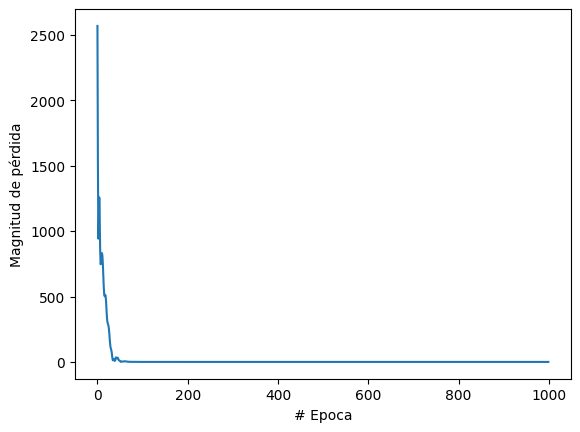

In [14]:
# ver el resultado de la función de pérdida para ver qué tan mal están los resultados de la red neuronal en cada vuelta que dió. Se puede ver que conforme se tuvo más iteraciones los errores fueron disminuyendo y ahí nos damos cuenta que con 1000 iteraciones, como colocamos en un principio, no sería necesario ya que por las 550 o 600 o 650 iteraciones ya no varía mucho el error. Darse cuenta también que al tener solo una capa se demoró más en mantener un error mínimo casi constante y aproximadamente en la iteración 550 o 600 o 650 ya dejó de aprender pero usando las 3 capas aprende mucho más rápido y demoró menos en mantener un error mínimo casi constante ya que aproximadamente en la iteración 50 o 70 ya dejó de aprender lo que nos da como una posible conclusión de que una red más compleja nos da mejores resultado y más rápido (aunque no en todos los casos se cumple esa posible conclusión)
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [15]:
# hacer una predicción
print("Hagamos una predicción!")
resultado = modelo.predict([100.0]) # el resultado esperado es (212 fahrenheit) lo cual el resultado nos da (211.74408 fahrenheit) que es muy cercano al valor verdadero
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 59ms/step
El resultado es [[211.74744]] fahrenheit!


In [16]:
# funciones para saber las variables internas del modelo
print("Variables internas del modelo")
# con una sola capa de salida que automáticamente nos autoregistra la capa de entrada con una neurona
# print(capa.get_weights()) # [array([[1.7981316]], dtype=float32), array([31.930923], dtype=float32)] donde el peso es 1.7981316 y el sesgo es 31.930923 lo cual sería si el valor es (100 celsius) que queremos pasarlo a fahrenheit lo que hizo aquí sería (100 * 1.7981316 = 179.81316 + 31.930923 = 211.744083)

# con más capas que serán las capas ocultas nos darán otros números para los pesos y para los sesgos los cuales son la mejor combinación que encontró en el proceso de optimización para llegar al resultado más acertado
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.19107829, -0.08798367,  0.5376464 ]], dtype=float32), array([-3.463208 , -1.2098008,  3.6218174], dtype=float32)]
[array([[-0.87761337, -1.1533529 ,  0.55253893],
       [-0.32466233,  0.27242887, -1.7570392 ],
       [ 0.50328267,  1.2016932 ,  0.13952115]], dtype=float32), array([3.2155595, 3.6004136, 3.237509 ], dtype=float32)]
[array([[1.2775531],
       [1.3543508],
       [0.4877349]], dtype=float32), array([3.467967], dtype=float32)]


# Conclusiones:
En este ejemplo, aunque es un ejemplo muy simple y se puede resolver con una reu neuronal muy simple (2 capas = 1 entrada y 1 salida) también podemos ver que usando una red neuronal un poco más compleja (4 capas = 1 entrada / 2 ocultas / 1 salida) puede aprender un algoritmo para resolver el problema siguiendo caminos o formas totalmente distintos y llegar a un peor resultado en algunos casos o sino a un resultado similar o mejor.